<a href="https://colab.research.google.com/github/suryogumilar/tensorflow_playground/blob/main/C2_W1_Lab_1_cats_vs_dogs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Data Generator and Image dataset from directory

test about tensorflow keras Image Data generator and Image dataset from directory

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:

import zipfile
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory # 'tis a function
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files

Download the dataset and unzip

In [3]:

!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-12-15 04:55:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   114MB/s    in 0.6s    

2022-12-15 04:55:36 (114 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [5]:
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [6]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

print('base dir is:', base_dir)
print('')

print('train dir is :', train_dir)
print('validation dir is :', validation_dir)

print('')
print('train cats dir is:', train_cats_dir)
print('train dogs dir is:', train_dogs_dir)

print()
print('validation cats dir:', validation_cats_dir)
print('validation dogs dir:', validation_dogs_dir)

base dir is: cats_and_dogs_filtered

train dir is : cats_and_dogs_filtered/train
validation dir is : cats_and_dogs_filtered/validation

train cats dir is: cats_and_dogs_filtered/train/cats
train dogs dir is: cats_and_dogs_filtered/train/dogs

validation cats dir: cats_and_dogs_filtered/validation/cats
validation dogs dir: cats_and_dogs_filtered/validation/dogs


## Image data generator 

In [7]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
train_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [9]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [10]:
train_generator.class_mode

'binary'

In [11]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
train_generator.target_size

(150, 150)

In [13]:
print('train batch size is:', train_generator.batch_size)
print('train dataset size:', len(train_generator.labels))

train batch size is: 20
train dataset size: 2000


## Image dataset from directory

In [14]:
train_dataset = image_dataset_from_directory(train_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))
validation_dataset = image_dataset_from_directory(validation_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
print('class names:', train_dataset.class_names)

print('file paths len:', len(train_dataset.file_paths))
print('element spec:', train_dataset.element_spec)


class names: ['cats', 'dogs']
file paths len: 2000
element spec: (TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))


class names: ['cats', 'dogs']
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


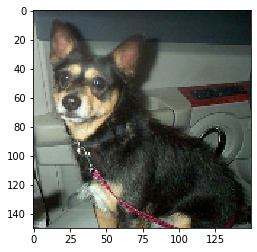

label is: [1.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


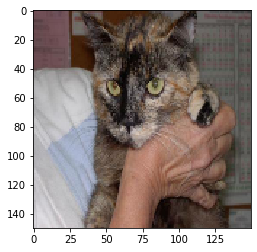

label is: [0.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


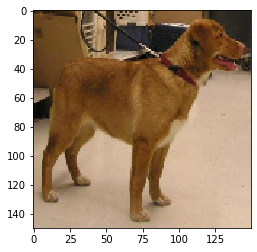

label is: [1.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


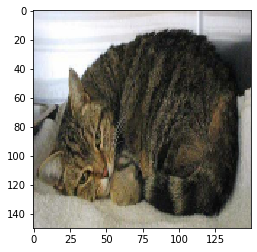

label is: [0.]
<class 'tuple'>
<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(150, 150, 3)
<class 'numpy.ndarray'>


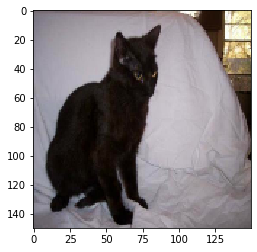

label is: [0.]


In [16]:
from PIL import Image
print('class names:', train_dataset.class_names)
i = 0
for data_batch in train_dataset:
  print(type(data_batch))
  images, labels = data_batch
  print(type(images), type(labels))
  print(type(images[0]))
  for label in labels:
    print(images[0].shape)
    image_numpy = images[0].numpy()
    print(type(image_numpy))
    the_image = Image.fromarray(np.uint8(image_numpy))
    plt.imshow(the_image, interpolation='nearest')
    plt.show()
    print('label is:', label.numpy())
    break
  if(i>3):  
    break
  i=i+1

### rescaling in `image_dataset_from_directory()`

In [26]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

def change_inputs(images, labels):
  x = tf.image.resize(normalization_layer(images),[150, 150], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return x, labels

normalized_tds = train_dataset.map(change_inputs)
normalized_vds = validation_dataset.map(change_inputs)

In [28]:
print('element spec:', normalized_tds.element_spec)

element spec: (TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))


## simple model

In [29]:
## set seed so that model has same 'common ground' (it node's weight and bias are the same value on each creation)
def create_model():
  tf.random.set_seed(10)

  model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 150x150 with 3 bytes color
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(), 
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'), 
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
      tf.keras.layers.Dense(1, activation='sigmoid')  
  ])
  model.compile(optimizer=RMSprop(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics = ['accuracy'])
  return model



In [30]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

#### training

In [31]:
history = model.fit(
            normalized_tds,
            epochs=15,
            validation_data=normalized_vds,
            verbose=2
            )

Epoch 1/15
100/100 - 14s - loss: 0.7509 - accuracy: 0.5400 - val_loss: 0.6437 - val_accuracy: 0.6690 - 14s/epoch - 135ms/step
Epoch 2/15
100/100 - 5s - loss: 0.6310 - accuracy: 0.6630 - val_loss: 0.6116 - val_accuracy: 0.6760 - 5s/epoch - 55ms/step
Epoch 3/15
100/100 - 5s - loss: 0.5474 - accuracy: 0.7355 - val_loss: 0.5755 - val_accuracy: 0.7040 - 5s/epoch - 55ms/step
Epoch 4/15
100/100 - 5s - loss: 0.4437 - accuracy: 0.7925 - val_loss: 0.6159 - val_accuracy: 0.7100 - 5s/epoch - 54ms/step
Epoch 5/15
100/100 - 6s - loss: 0.3407 - accuracy: 0.8460 - val_loss: 1.0655 - val_accuracy: 0.6250 - 6s/epoch - 55ms/step
Epoch 6/15
100/100 - 6s - loss: 0.2565 - accuracy: 0.8885 - val_loss: 0.7875 - val_accuracy: 0.7100 - 6s/epoch - 57ms/step
Epoch 7/15
100/100 - 6s - loss: 0.1671 - accuracy: 0.9345 - val_loss: 0.9093 - val_accuracy: 0.7020 - 6s/epoch - 60ms/step
Epoch 8/15
100/100 - 6s - loss: 0.1167 - accuracy: 0.9545 - val_loss: 1.1390 - val_accuracy: 0.7250 - 6s/epoch - 64ms/step
Epoch 9/15
10

## Plot history

In [34]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

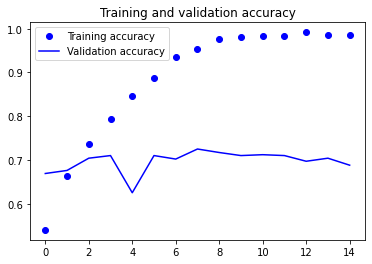

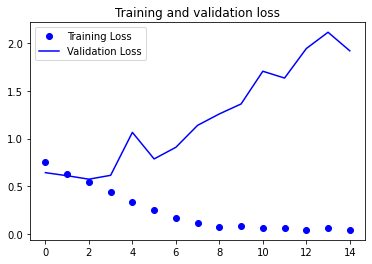

In [35]:
# Plot training results
plot_loss_acc(history)

### MinMax scale between -1, 1

In [38]:
train_dataset = image_dataset_from_directory(train_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))
validation_dataset = image_dataset_from_directory(validation_dir,
                                             batch_size=20,
                                             label_mode='binary',
                                             image_size=(150, 150))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [49]:
minmax_layer = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)

def change_inputs_minmax(images, labels):
  x = tf.image.resize(minmax_layer(images),[150, 150], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return x, labels

minmax_tds = train_dataset.map(change_inputs_minmax)
minmax_vds = validation_dataset.map(change_inputs_minmax)

In [50]:
print('element spec:', normalized_tds.element_spec)
print('element spec:', minmax_tds.element_spec)

element spec: (TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
element spec: (TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))


## modle creation and retraining

In [51]:
model = create_model()

history = model.fit(
            minmax_tds,
            epochs=15,
            validation_data=minmax_vds,
            verbose=2
            )

Epoch 1/15
100/100 - 6s - loss: 0.7558 - accuracy: 0.5805 - val_loss: 0.6990 - val_accuracy: 0.5610 - 6s/epoch - 63ms/step
Epoch 2/15
100/100 - 5s - loss: 0.5765 - accuracy: 0.7010 - val_loss: 0.6116 - val_accuracy: 0.6910 - 5s/epoch - 54ms/step
Epoch 3/15
100/100 - 6s - loss: 0.4759 - accuracy: 0.7765 - val_loss: 0.5811 - val_accuracy: 0.7080 - 6s/epoch - 55ms/step
Epoch 4/15
100/100 - 5s - loss: 0.3714 - accuracy: 0.8390 - val_loss: 0.5565 - val_accuracy: 0.7380 - 5s/epoch - 54ms/step
Epoch 5/15
100/100 - 6s - loss: 0.2594 - accuracy: 0.8965 - val_loss: 0.7222 - val_accuracy: 0.7240 - 6s/epoch - 56ms/step
Epoch 6/15
100/100 - 6s - loss: 0.1735 - accuracy: 0.9335 - val_loss: 0.7316 - val_accuracy: 0.7360 - 6s/epoch - 55ms/step
Epoch 7/15
100/100 - 5s - loss: 0.0942 - accuracy: 0.9665 - val_loss: 1.1845 - val_accuracy: 0.7010 - 5s/epoch - 55ms/step
Epoch 8/15
100/100 - 6s - loss: 0.0641 - accuracy: 0.9800 - val_loss: 1.3604 - val_accuracy: 0.7220 - 6s/epoch - 64ms/step
Epoch 9/15
100/1

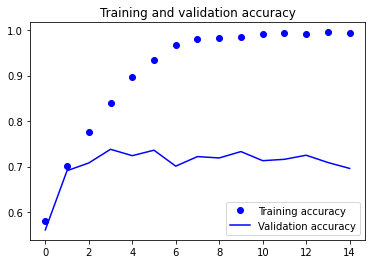

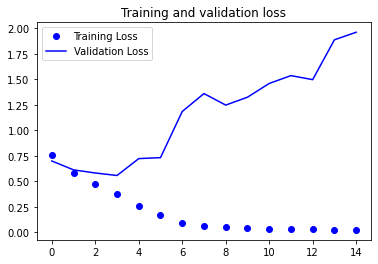

In [52]:
# Plot training results
plot_loss_acc(history)

In [65]:
print( normalized_tds.take(1))
print(type( normalized_tds.take(1)))
print(normalized_tds)

<TakeDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [66]:

def tfdata_unzip(
    tfdata: tf.data.Dataset,
    *,
    recursive: bool=False,
    eager_numpy: bool=False,
    num_parallel_calls: int=tf.data.AUTOTUNE,
):
    """
    Unzip a zipped tf.data pipeline.

    Args:
        tfdata: the :py:class:`tf.data.Dataset`
            to unzip.

        recursive: Set to ``True`` to recursively unzip
            multiple layers of zipped pipelines.
            Defaults to ``False``.

        eager_numpy: Set this to ``True`` to return
            Python lists of primitive types or
            :py:class:`numpy.array` objects. Defaults
            to ``False``.

        num_parallel_calls: The level of parallelism to
            each time we ``map()`` over a
            :py:class:`tf.data.Dataset`.

    Returns:
        Returns a Python list of either
             :py:class:`tf.data.Dataset` or NumPy
             arrays.
    """
    if isinstance(tfdata.element_spec, tf.TensorSpec):
        if eager_numpy:
            return list(tfdata.as_numpy_iterator())
        return tfdata
        
    
    def tfdata_map(i: int) -> list:
        return tfdata.map(
            lambda *cols: cols[i],
            deterministic=True,
            num_parallel_calls=num_parallel_calls,
        )

    if isinstance(tfdata.element_spec, tuple):
        num_columns = len(tfdata.element_spec)
        if recursive:
            return [
                tfdata_unzip(
                    tfdata_map(i),
                    recursive=recursive,
                    eager_numpy=eager_numpy,
                    num_parallel_calls=num_parallel_calls,
                )
                for i in range(num_columns)
            ]
        else:
            return [
                tfdata_map(i)
                for i in range(num_columns)
            ]

    raise ValueError(
        "Unknown tf.data.Dataset element_spec: " +
        str(tfdata.element_spec)
    )

In [67]:
tfdata_unzip(normalized_tds)

[<ParallelMapDataset element_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None)>,
 <ParallelMapDataset element_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)>]

In [68]:
tfdata_unzip(normalized_tds.take(1))

[<ParallelMapDataset element_spec=TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None)>,
 <ParallelMapDataset element_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)>]

In [86]:
a, b  = tuple(zip(*normalized_tds.take(1)))

print(a[0].shape)
print(a[0][0].shape)

print(tf.math.reduce_max(a[0]))
print(tf.math.reduce_min(a[0]))

(20, 150, 150, 3)
(150, 150, 3)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [87]:
a, b  = tuple(zip(*minmax_tds.take(1)))

print(a[0].shape)
print(a[0][0].shape)

print(tf.math.reduce_max(a[0]))
print(tf.math.reduce_min(a[0]))

(20, 150, 150, 3)
(150, 150, 3)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
